In [2]:
import sys
print(sys.path)
sys.path.append('/home/zinovyev/anaconda3/lib/python3.7/site-packages')
print(sys.path)

['/mnt/c/Datas/SingleCellTranscriptomics/RNAVelocity', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/home/zinovyev/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/zinovyev/.local/lib/python3.7/site-packages/IPython/extensions', '/home/zinovyev/.ipython']
['/mnt/c/Datas/SingleCellTranscriptomics/RNAVelocity', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/home/zinovyev/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/zinovyev/.local/lib/python3.7/site-packages/IPython/extensions', '/home/zinovyev/.ipython', '/home/zinovyev/anaconda3/lib/python3.7/site-packages']


In [3]:
# preformat data
import numpy as np
import pandas as pd
import elpigraph_ps_tools

/home/zinovyev/.local/lib/python3.7/site-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
filename = '/mnt/c/Datas/SingleCellTranscriptomics/Retinoblastoma/Y79/count.txt'
with open(filename,'r') as fin, open(filename[0:-4]+'_out.txt','w') as fout:
    ln = fin.readline()[:-1]
    fout.write('GENE'+ln+'\n')
    ln = fin.readline()
    while ln:
        fout.write(ln)
        ln = fin.readline()

In [3]:
cell_cycle_genes_file = '/mnt/c/Datas/MOSAIC/expression/chromium_data/final/data/cell_cycle_genes.txt'
cell_cycle_genes = []

with open(cell_cycle_genes_file,'r') as fin:
    ln = fin.readline()[:-1]
    while ln:
        cell_cycle_genes.append(ln)
        ln = fin.readline()[:-1]
print(len(cell_cycle_genes),' cell cycle genes')

298  cell cycle genes


In [4]:
import numpy as np


#folder = '/mnt/c/Datas/SingleCellTranscriptomics/EwingSarcoma_Miller2020/'
folder = '/mnt/c/Datas/MOSAIC/expression/chromium_data/final/data/'

prefix = 'Y79'
#prefix = 'TC71'
prefix1 = '_nufp10k.txt'

#fn = folder+prefix+'/'+prefix+'.txt'
fn = folder+prefix+prefix1

gene_names = []
sample_names = []

only_cell_cycle_genes = False
restricted_set = set()
if only_cell_cycle_genes:
    restricted_set = set(cell_cycle_genes)

k=0
gene_names_inds = []
with open(fn,'r') as fid:
    ln = fid.readline()[:-1].strip('\t')
    sample_names = ln.split('\t')[1:]
    ln = fid.readline()[:-1].strip('\t')
    while ln:
        parts = ln.split('\t')
        if only_cell_cycle_genes:
            if(parts[0] in restricted_set):
                gene_names.append(parts[0])
                gene_names_inds.append(k)           
        else:
            gene_names.append(parts[0])
            gene_names_inds.append(k)
        k = k+1
        ln = fid.readline()[:-1].strip('\t')
        
print('Number of genes :{}, Number of samples :{}'.format(len(gene_names),len(sample_names)))
        
matrix = np.zeros((len(gene_names),len(sample_names)))

gene_names_inds_set = set(gene_names_inds)
                  
with open(fn,'r') as fid:
    ln = fid.readline()[:-1].strip('\t')
    ln = fid.readline()[:-1].strip('\t')
    k = 0
    k1 = 0
    while ln:
        parts = ln.split('\t')
        gn = parts[0]
        if k in gene_names_inds_set:
            for i,s in enumerate(parts[1:]):
                matrix[k1,i] = float(s)
            k1 = k1+1
        k = k+1
        ln = fid.readline()[:-1].strip('\t')


Number of genes :10000, Number of samples :4388


In [5]:
import pandas as pd

module_file = folder+prefix+'_nufp2k.txt.moduleAverages'

df = pd.read_csv(module_file,delimiter='\t')

groups = [line.rstrip('\n') for line in open('groups/Y79_classes.txt')]
groupsn = [int(s) for s in groups]

plt.scatter(df['Y79_IC2'],df['Y79_IC9+'],c=groupsn)
plt.xlabel('Y79_IC2')
plt.ylabel('Y79_IC9+')

display(df)

NameError: name 'plt' is not defined

In [ ]:
from sklearn.decomposition import PCA

print(matrix.shape)
pca = PCA()
u = pca.fit_transform(matrix.transpose())
v = v = pca.components_.T
s = pca.explained_variance_


In [8]:
print(v.shape)

with open(folder+prefix+prefix1+'_pca_metagenes.txt','w') as fid:
    cols = []
    for i in range(0,10):
        cols.append('PC{}'.format(i+1))
    fid.write('GENE\t'+'\t'.join(cols)+'\n')
    for k,g in enumerate(gene_names):
        vals = ['{}'.format(v[k,j]) for j in range(0,10)]
        fid.write(g+'\t'+'\t'.join(vals)+'\n')
        
with open(folder+prefix+prefix1+'_pca_coords.txt','w') as fid:
    cols = []
    for i in range(0,10):
        cols.append('PC{}'.format(i+1))
    fid.write('CELL\t'+'\t'.join(cols)+'\n')
    for k,g in enumerate(sample_names):
        vals = ['{}'.format(u[k,j]) for j in range(0,10)]
        fid.write(g+'\t'+'\t'.join(vals)+'\n')

(10000, 4388)


In [11]:
import umap
reducer = umap.UMAP()
umap_coords = reducer.fit_transform(matrix.transpose())


/home/zinovyev/.local/lib/python3.7/site-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


Text(0, 0.5, 'UMAP2')

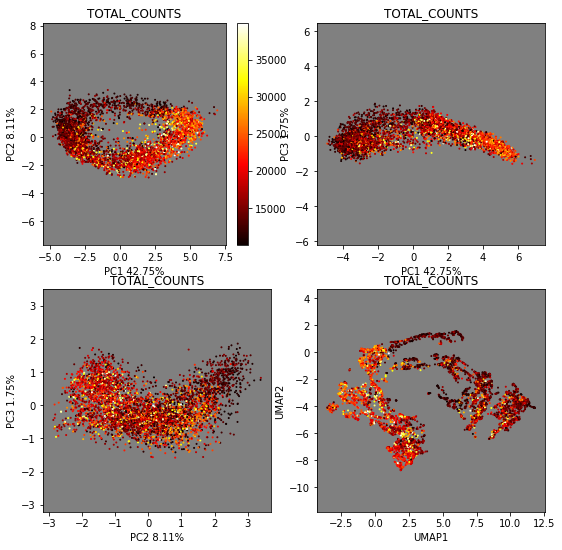

In [15]:
import matplotlib.pyplot as plt

#plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'grey'

#score_name = 'PID138045_HIF1alpha_transcription_factor_network'
#score_name = 'REACTOME1269960_Glycolysis'
#score_name = 'COL6A1_COL6A2_correlated'
#score_name = 'Lessnick_EWS-FLI_Up'
#score_name = 'GO0000398_mRNA_splicing_via_spliceosome'
#score_name = 'M13867_CDH1kd'
#score_name = 'CASPASES'
#score_name = 'GO0045333_cellular_respiration'
#score_name = 'ER_STRESS'
#score_name = 'EF1_DIRECT'
#score_name = 'ECM_HYPOXIA_ATTRACTOR'

#score_name = 'FREEMAN_G2M_CC6'
#score_name = 'FREEMAN_G1S_CC4'
score_name = 'TOTAL_COUNTS'
#score_name = 'IC14+'
# score_name = 'CADHERINS'
#score_name = 'GO_0001754_eye_photoreceptor_cell_differentiation'
#score_name = 'Y79_HETEROGENEITY'
#score_name = 'Y79_IC4'
#score_name = 'HALLMARK_GLYCOLYSIS'

#u = -u
#u[:,1] = -u[:,1]

score = df[score_name]

plt.figure(figsize=(9,9))
plt.subplot(221)
plt.scatter(u[:,0],u[:,1],c=score,s=1,cmap='hot')
plt.axis('equal')
plt.colorbar()
plt.xlabel('PC1 {:.2f}%'.format(s[0]/np.sum(s)*100))
plt.ylabel('PC2 {:.2f}%'.format(s[1]/np.sum(s)*100))
plt.axis('equal')
plt.title(score_name)
plt.subplot(222)
plt.scatter(u[:,0],u[:,2],c=score,s=1,cmap='hot')
plt.axis('equal')
plt.title(score_name)
plt.xlabel('PC1 {:.2f}%'.format(s[0]/np.sum(s)*100))
plt.ylabel('PC3 {:.2f}%'.format(s[2]/np.sum(s)*100))
plt.subplot(223)
plt.scatter(u[:,1],u[:,2],c=score,s=1,cmap='hot')
plt.axis('equal')
plt.title(score_name)
plt.xlabel('PC2 {:.2f}%'.format(s[1]/np.sum(s)*100))
plt.ylabel('PC3 {:.2f}%'.format(s[2]/np.sum(s)*100))


plt.subplot(224)
plt.scatter(umap_coords[:,0],-umap_coords[:,1],c=score,s=1,cmap='hot')
plt.axis('equal')
plt.title(score_name)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')




10000


Text(0, 0.5, 'UMAP2')

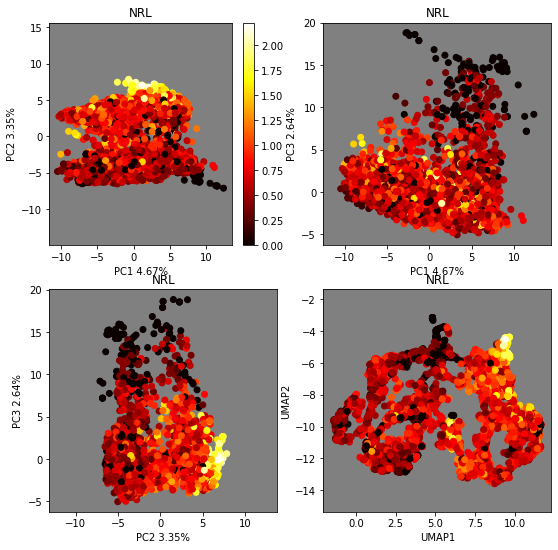

In [23]:
import matplotlib.pyplot as plt

#plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'grey'
#gene_name = 'TIMP1'
gene_name = 'OTP'
gene_name = 'ENO3'
gene_name = 'RCVRN'
gene_name = 'THY1'
gene_name = 'NEAT1'
gene_name = 'RCVRN'
gene_name = 'NRL'
gene_name = 'ROM1'
#gene_name = 'TFF1'
#gene_name = 'ARR3'
gene_name = 'NEAT1'
gene_name = 'RAX'
gene_name = 'RCVRN'
gene_name = 'NRL'

#u = -u
#u[:,1] = -u[:,1]
print(len(gene_names))

score = matrix[gene_names.index(gene_name),:]

plt.figure(figsize=(9,9))
plt.subplot(221)
plt.scatter(u[:,0],u[:,1],c=score,cmap='hot')
plt.axis('equal')
plt.colorbar()
plt.xlabel('PC1 {:.2f}%'.format(s[0]/np.sum(s)*100))
plt.ylabel('PC2 {:.2f}%'.format(s[1]/np.sum(s)*100))
plt.axis('equal')
plt.title(gene_name)
plt.subplot(222)
plt.scatter(u[:,0],u[:,2],c=score,cmap='hot')
plt.axis('equal')
plt.title(gene_name)
plt.xlabel('PC1 {:.2f}%'.format(s[0]/np.sum(s)*100))
plt.ylabel('PC3 {:.2f}%'.format(s[2]/np.sum(s)*100))
plt.subplot(223)
plt.scatter(u[:,1],u[:,2],c=score,cmap='hot')
plt.axis('equal')
plt.title(gene_name)
plt.xlabel('PC2 {:.2f}%'.format(s[1]/np.sum(s)*100))
plt.ylabel('PC3 {:.2f}%'.format(s[2]/np.sum(s)*100))


plt.subplot(224)
plt.scatter(umap_coords[:,0],-umap_coords[:,1],c=score,cmap='hot')
plt.axis('equal')
plt.title(gene_name)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')




Text(0.5, 1.0, 'TOTAL_COUNTS')

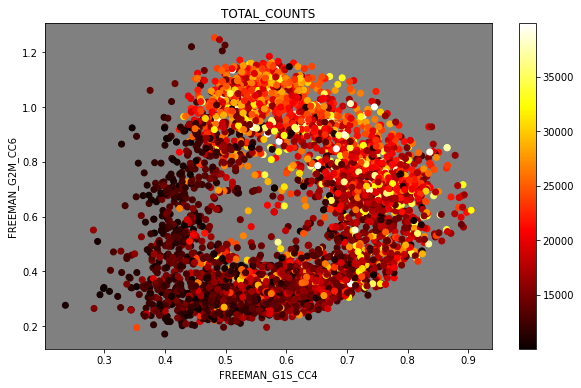

In [8]:
import matplotlib.pyplot as plt

#plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'grey'

#coord_name1 = 'IC1+'
#coord_name2 = 'IC2+'
coord_name1 = 'FREEMAN_G1S_CC4'
coord_name2 = 'FREEMAN_G2M_CC6'
#score_name = 'PID138045_HIF1alpha_transcription_factor_network'
#score_name = 'REACTOME1269960_Glycolysis'
#score_name = 'COL6A1_COL6A2_correlated'
#score_name = 'Lessnick_EWS-FLI_Up'
#score_name = 'GO0000398_mRNA_splicing_via_spliceosome'
#score_name = 'M13867_CDH1kd'
#score_name = 'CASPASES'
#score_name = 'GO0045333_cellular_respiration'
#score_name = 'ER_STRESS'
#score_name = 'EF1_DIRECT'
#score_name = 'ECM_HYPOXIA_ATTRACTOR'

#score_name = 'FREEMAN_G2M_CC6'
#score_name = 'FREEMAN_G1S_CC4'
score_name = 'TOTAL_COUNTS'
#score_name = 'Y79_IC4'
#score_name = 'IC14+'
# score_name = 'CADHERINS'
#score_name = 'GO_0001754_eye_photoreceptor_cell_differentiation'
#score_name = 'Y79_HETEROGENEITY'

#u = -u
#u[:,1] = -u[:,1]

x = df[coord_name1].to_numpy()
y = df[coord_name2].to_numpy()
score = df[score_name]

plt.figure(figsize=(10,6))
plt.subplot(111)
plt.scatter(x,y,c=score,cmap='hot')
#plt.axis('equal')
plt.colorbar()
plt.xlabel(coord_name1)
plt.ylabel(coord_name2)
plt.title(score_name)



In [6]:
import elpigraph

data = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)

egr2d = elpigraph.computeElasticPrincipalCircle(data,50)

ModuleNotFoundError: No module named 'elpigraph'

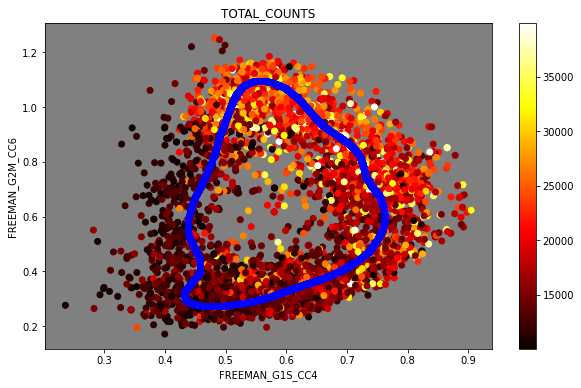

In [182]:
partition, dists = elpigraph.src.core.PartitionData(X = data, NodePositions = egr2d[0]['NodePositions'], MaxBlockSize = 100000000, TrimmingRadius = np.inf,SquaredX = np.sum(data**2,axis=1,keepdims=1))
ProjStruct = elpigraph.src.reporting.project_point_onto_graph(X = data,
                                     NodePositions = egr2d[0]['NodePositions'],
                                     Edges = egr2d[0]['Edges'][0],
                                     Partition = partition)
#display(ProjStruct)


plt.figure(figsize=(10,6))
plt.subplot(111)
plt.scatter(x,y,c=score,cmap='hot')
#plt.axis('equal')
plt.colorbar()
plt.xlabel(coord_name1)
plt.ylabel(coord_name2)
plt.title(score_name)

plt.plot(ProjStruct['X_projected'][:,0],ProjStruct['X_projected'][:,1],'bo')



Text(0, 0.5, 'RCVRN')

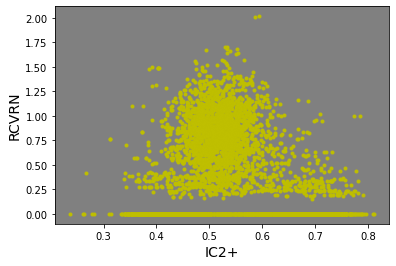

In [185]:
gene = 'NEAT1'
gene = 'RAX'
gene = 'RCVRN'
genev = matrix[gene_names.index(gene),:]
ic2 = df['Y79_IC2'].to_numpy()
ic9 = df['Y79_IC9-'].to_numpy()
ic4 = df['Y79_IC4'].to_numpy()
total_counts = df['TOTAL_COUNTS'].to_numpy()
plt.plot(ic2,genev,'y.')
#plt.plot(total_counts,ic4,'y.')
plt.xlabel('IC2+',fontsize=14)
plt.ylabel(gene,fontsize=14)

The initial number of nodes must be at least 3. This will be fixed
Generating the initial configuration
Creating a circle in the plane induced by the 1st and 2nd PCs with 3 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
3 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  50  nodes on  4388  points and  3  dimensions
Nodes =  3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||50	0.0046	50	50	50	0	0	0	0.0033	0.0032	0.9758	0.977	0.0011	0.0001	0.0066	0.3283	0


MSDEnergyPlot not yet implemented
accuracyComplexityPlot not yet implemented
3.7632  seconds elapsed


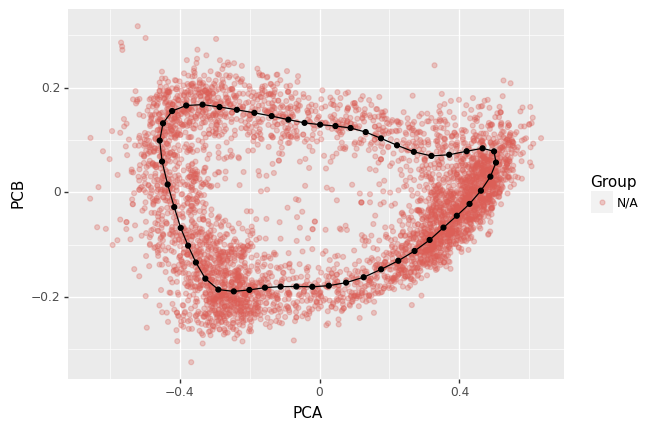

[<ggplot: (8730827212793)>]


In [12]:
# quantification of cyclic pseudo-time from ICAs associated to the cell cycle
import elpigraph

ica_metasamples = folder+'Y79/Y79_nufp10k_ica_A.xls'
ica_df = pd.read_csv(ica_metasamples,delimiter='\t')

# cell_cycle_ics_data = ica_df[['IC1','IC7','IC10']].to_numpy()
cell_cycle_ics_data = df[['Y79_IC1','Y79_IC7','Y79_IC10']].to_numpy()
egr = elpigraph.computeElasticPrincipalCircle(cell_cycle_ics_data,50)

Text(0.5, 1.0, 'TOTAL_COUNTS')

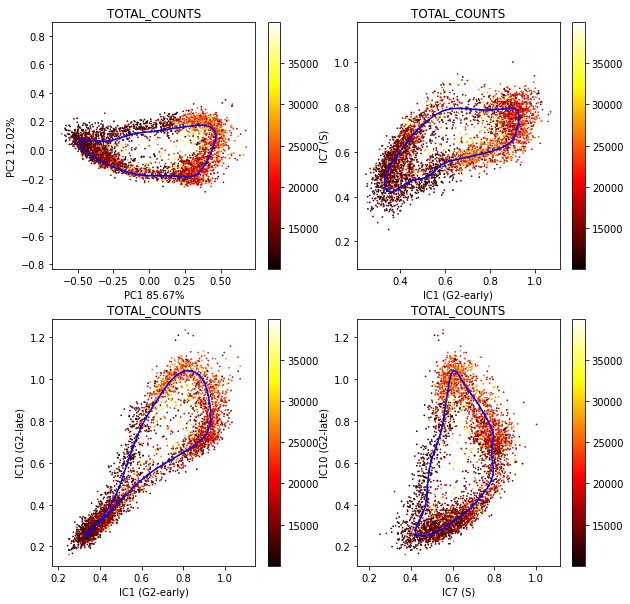

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA()
mean_vector = np.mean(cell_cycle_ics_data)
u = pca.fit_transform(cell_cycle_ics_data)
v = pca.components_.T
s = pca.explained_variance_

nodep = egr[0]['NodePositions']
edges = egr[0]['Edges'][0]
nodep_pca = np.matmul(nodep-mean_vector,v)
#mean_vector = 

score_name = 'TOTAL_COUNTS'
#score_name = 'Y79_IC10'
#score_name = 'Y79_IC7'
#score_name = 'Y79_IC10'
score = df[score_name]
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(u[:,0],u[:,1],c=score,s=0.5,cmap='hot')
for e in edges:
    plt.plot([nodep_pca[e[0],0],nodep_pca[e[1],0]],[nodep_pca[e[0],1],nodep_pca[e[1],1]],'b-')
plt.axis('equal')
plt.colorbar()
plt.xlabel('PC1 {:.2f}%'.format(s[0]/np.sum(s)*100))
plt.ylabel('PC2 {:.2f}%'.format(s[1]/np.sum(s)*100))
plt.axis('equal')
plt.title(score_name)
plt.subplot(222)
plt.scatter(cell_cycle_ics_data[:,0],cell_cycle_ics_data[:,1],c=score,s=0.5,cmap='hot')
for e in edges:
    plt.plot([nodep[e[0],0],nodep[e[1],0]],
             [nodep[e[0],1],nodep[e[1],1]],'b-')
plt.axis('equal')
plt.colorbar()
plt.xlabel('IC1 (G2-early)')
plt.ylabel('IC7 (S)')
plt.axis('equal')
plt.title(score_name)
plt.subplot(223)
plt.scatter(cell_cycle_ics_data[:,0],cell_cycle_ics_data[:,2],c=score,s=0.5,cmap='hot')
for e in edges:
    plt.plot([nodep[e[0],0],nodep[e[1],0]],
             [nodep[e[0],2],nodep[e[1],2]],'b-')
plt.axis('equal')
plt.colorbar()
plt.xlabel('IC1 (G2-early)')
plt.ylabel('IC10 (G2-late)')
plt.axis('equal')
plt.title(score_name)
plt.subplot(224)
plt.scatter(cell_cycle_ics_data[:,1],cell_cycle_ics_data[:,2],c=score,s=0.5,cmap='hot')
for e in edges:
    plt.plot([nodep[e[0],1],nodep[e[1],1]],
             [nodep[e[0],2],nodep[e[1],2]],'b-')
plt.axis('equal')
plt.colorbar()
plt.xlabel('IC7 (S)')
plt.ylabel('IC10 (G2-late)')
plt.axis('equal')
plt.title(score_name)



Suggested edge to remove 25
Selected edge to remove 25


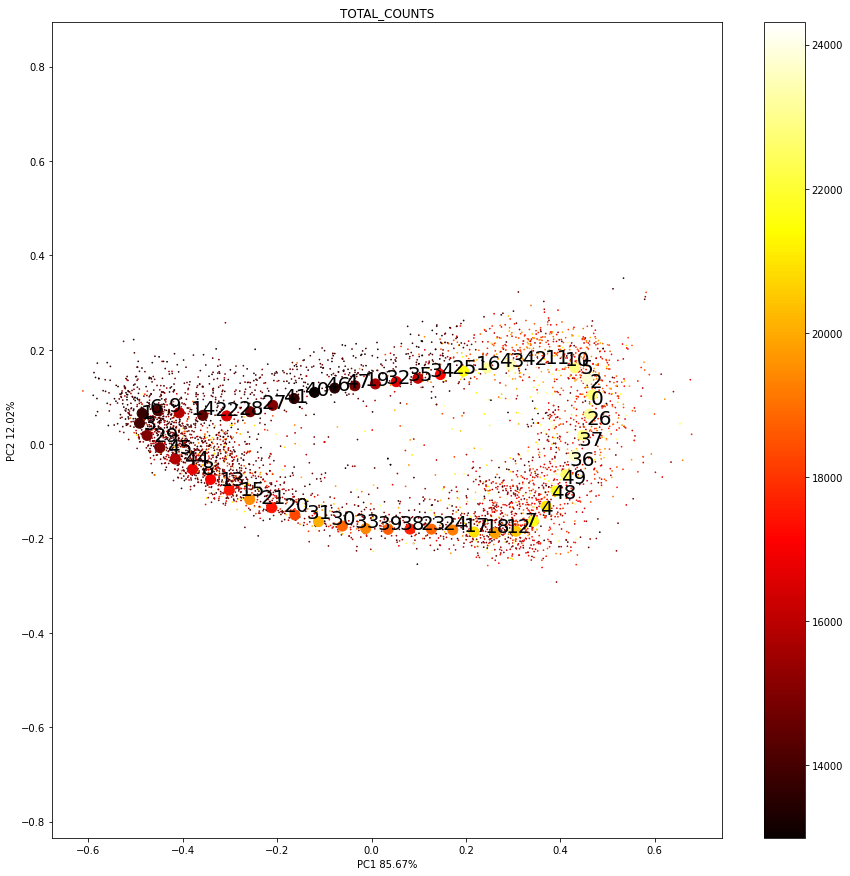

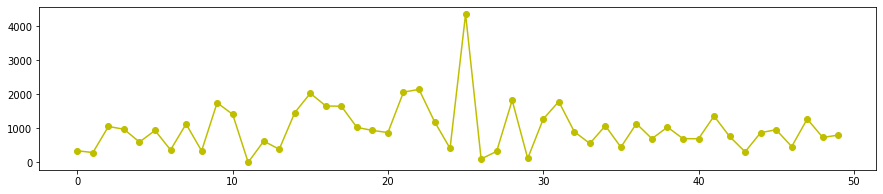

In [17]:
partition, dists = elpigraph.src.core.PartitionData(X = cell_cycle_ics_data, NodePositions = egr[0]['NodePositions'], MaxBlockSize = 100000000, TrimmingRadius = np.inf,SquaredX = np.sum(cell_cycle_ics_data**2,axis=1,keepdims=1))
ProjStruct = elpigraph.src.reporting.project_point_onto_graph(X = cell_cycle_ics_data,
                                     NodePositions = egr[0]['NodePositions'],
                                     Edges = egr[0]['Edges'][0],
                                     Partition = partition)

total_counts = df['TOTAL_COUNTS'].to_numpy()
node_read_counts = np.zeros(nodep.shape[0])
edge_abs_diff_counts = np.zeros(len(edges))
for i in range(len(nodep)):
    node_read_counts[i] = np.mean(total_counts[np.where(partition==i)[0]])
for i,e in enumerate(edges):
    edge_abs_diff_counts[i] = np.abs(node_read_counts[e[0]]-node_read_counts[e[1]])

plt.figure(figsize=(15,15))
plt.scatter(u[:,0],u[:,1],c=score,s=0.5,cmap='hot')
plt.scatter(nodep_pca[:,0],nodep_pca[:,1],c=node_read_counts,s=100,cmap='hot')
#for i in range(len(nodep)):
#    plt.text(nodep_pca[i,0],nodep_pca[i,1],str(i),fontsize=20)
for i,e in enumerate(edges):
    mn_posx = np.mean(nodep_pca[e,0])
    mn_posy = np.mean(nodep_pca[e,1])
    plt.text(mn_posx,mn_posy,str(i),fontsize=20)

plt.axis('equal')
plt.colorbar()
plt.xlabel('PC1 {:.2f}%'.format(s[0]/np.sum(s)*100))
plt.ylabel('PC2 {:.2f}%'.format(s[1]/np.sum(s)*100))
plt.axis('equal')
plt.title(score_name)
    
plt.figure(figsize=(15,3))
plt.plot(edge_abs_diff_counts,'yo-')

print('Suggested edge to remove',np.argmax(edge_abs_diff_counts))
edge_to_remove = 25
print('Selected edge to remove',edge_to_remove)

In [21]:
print(egr[0].keys())

dict_keys(['NodePositions', 'Edges', 'ReportTable', 'FinalReport', 'ElasticMatrix', 'Lambda', 'Mu', 'TrimmingRadius', 'Mode', 'MaxNumberOfIterations', 'eps', 'Date', 'TicToc', 'times', 'SubSetID', 'ReplicaID', 'ProbPoint'])


In [21]:
gr = egr[0].copy()
edges = np.delete(gr['Edges'][0],25,axis=0)
w1 = np.delete(gr['Edges'][1],25,axis=0)
w2 = np.delete(gr['Edges'][2],25,axis=0)
gr['Edges'] = (edges,w1,w2)

traj = extract_trajectories(gr,35,verbose=False)[0]
print(traj)

ProjStruct = project_on_tree(cell_cycle_ics_data,gr)
#pseudo_time_trajectory(traj,ProjStruct)
PseudoTimeTraj = quantify_pseudotime([traj],ProjStruct,producePlot=False)
points = PseudoTimeTraj[0]['Points'] 
pst = PseudoTimeTraj[0]['Pseudotime']

[35, 42, 40, 5, 30, 48, 3, 45, 13, 37, 33, 26, 21, 17, 8, 1, 11, 38, 47, 6, 20, 24, 27, 32, 16, 39, 4, 41, 44, 9, 34, 12, 29, 23, 18, 14, 0, 49, 31, 43, 36, 7, 2, 10, 15, 22, 19, 46, 28, 25]


Text(0.5, 1.0, 'Y79_TOTAL_COUNTS')

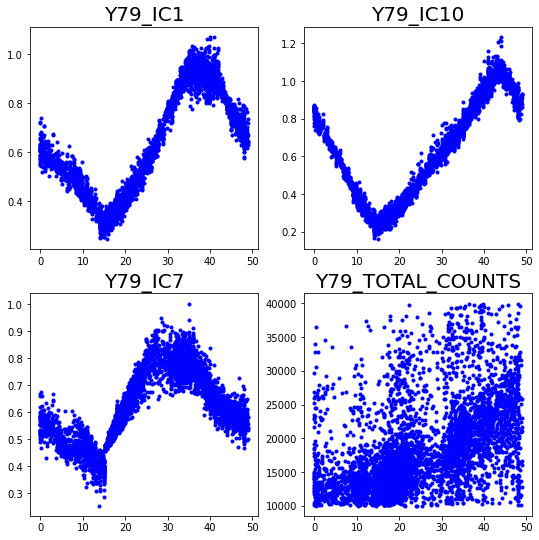

In [22]:
plt.figure(figsize=(9,9))
plt.subplot(221)
plt.plot(pst,df.Y79_IC1[points],'b.')
plt.title('Y79_IC1',fontsize=20)
plt.subplot(222)
plt.plot(pst,df.Y79_IC10[points],'b.')
plt.title('Y79_IC10',fontsize=20)
plt.subplot(223)
plt.plot(pst,df.Y79_IC7[points],'b.')
plt.title('Y79_IC7',fontsize=20)
plt.subplot(224)
plt.plot(pst,df.TOTAL_COUNTS[points],'b.')
plt.title('Y79_TOTAL_COUNTS',fontsize=20)


Text(0.5, 1.0, 'Y79_IC9-')

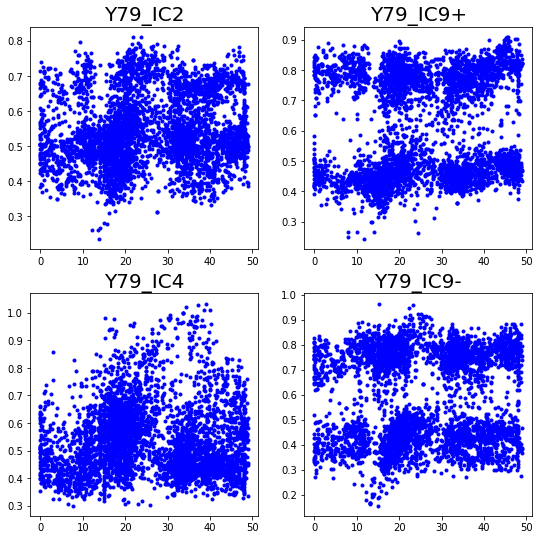

In [23]:
plt.figure(figsize=(9,9))
plt.subplot(221)
plt.plot(pst,df.Y79_IC2[points],'b.')
plt.title('Y79_IC2',fontsize=20)
plt.subplot(222)
plt.plot(pst,df['Y79_IC9+'][points],'b.')
plt.title('Y79_IC9+',fontsize=20)
plt.subplot(223)
plt.plot(pst,df.Y79_IC4[points],'b.')
plt.title('Y79_IC4',fontsize=20)
plt.subplot(224)
plt.plot(pst,df['Y79_IC9-'][points],'b.')
plt.title('Y79_IC9-',fontsize=20)


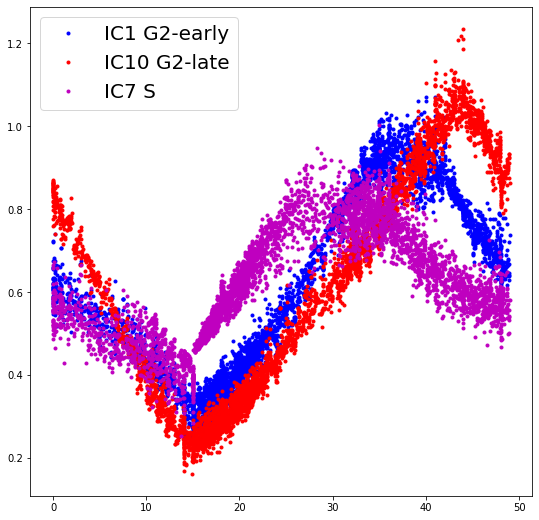

In [24]:
plt.figure(figsize=(9,9))
plt.plot(pst,df.Y79_IC1[points],'b.')
plt.plot(pst,df.Y79_IC10[points],'r.')
plt.plot(pst,df.Y79_IC7[points],'m.')
plt.legend(['IC1 G2-early','IC10 G2-late','IC7 S'],fontsize=20)


Text(0, 0.5, 'CCNB1')

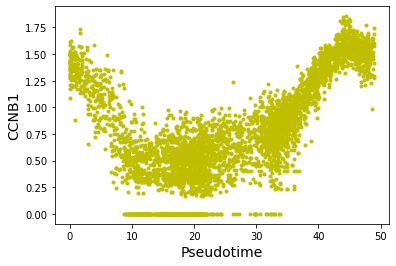

In [25]:
#gene = 'NEAT1'
#gene = 'RAX'
#gene = 'RCVRN'
#gene = 'ARR3'
gene = 'HIST1H4C'
gene = 'MCM10'
gene = 'CCNB1'
#gene = 'PRAME'
genev = matrix[gene_names.index(gene),points]
plt.plot(pst,genev,'y.')
#plt.plot(total_counts,ic4,'y.')
plt.xlabel('Pseudotime',fontsize=14)
plt.ylabel(gene,fontsize=14)

Text(0, 0.5, 'NEAT1')

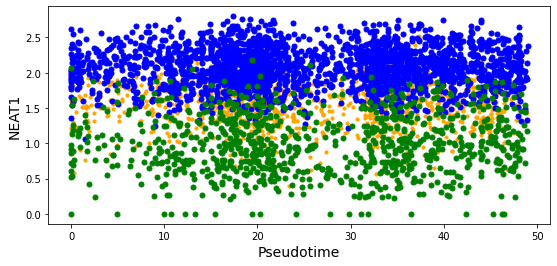

In [26]:
gene = 'NEAT1'
#gene = 'RAX'
#gene = 'RCVRN'
#gene = 'ARR3'
#gene = 'HIST1H4C'
#gene = 'MCM10'
#gene = 'CCNB1'
#gene = 'TFF1'
groupsa = np.array(groups)
inds1 = np.where(groupsa=='1')
inds2 = np.where(groupsa=='2')
inds3 = np.where(groupsa=='3')
genev = matrix[gene_names.index(gene),:]
plt.figure(figsize=(9,4))
plt.plot(pst[inds1],genev[inds1],'b.',markersize=10)
plt.scatter(pst[inds2],genev[inds2],color='orange',s=10)
plt.plot(pst[inds3],genev[inds3],'g.',markersize=10)
#plt.plot(total_counts,ic4,'y.')
plt.xlabel('Pseudotime',fontsize=14)
plt.ylabel(gene,fontsize=14)

Text(0, 0.5, 'Number of cells')

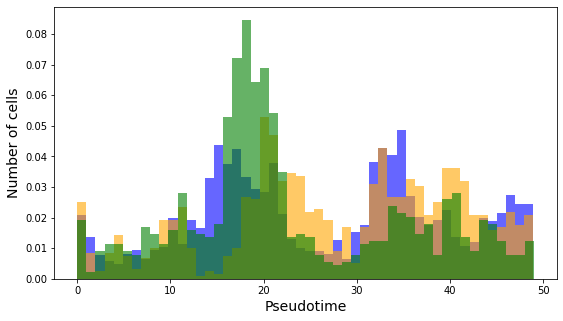

In [27]:
plt.figure(figsize=(9,5))
filter1=np.where(np.isin(points,inds1))
filter2=np.where(np.isin(points,inds2))
filter3=np.where(np.isin(points,inds3))

plt.hist(pst[filter1],bins=50,color='b',alpha = 0.6,density=True)
plt.hist(pst[filter2],bins=50,color='orange',alpha = 0.6,density=True)
plt.hist(pst[filter3],bins=50,color='g',alpha = 0.6,density=True)
plt.xlabel('Pseudotime',fontsize=14)
plt.ylabel('Number of cells',fontsize=14)

MED18 0.000763900338871415


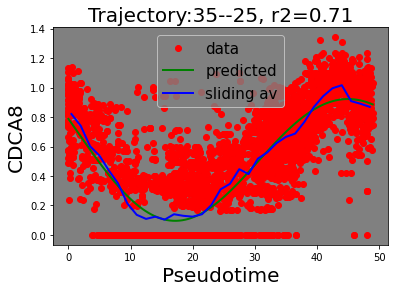

CDCA8 0.7132274703856395


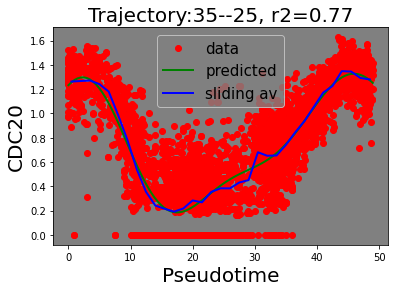

CDC20 0.7726469164240053


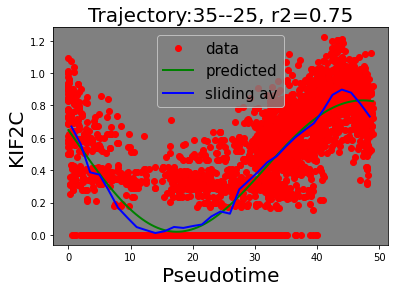

KIF2C 0.7488871706153273
JUN 0.037825732372660625
PALMD 0.02677749866300294


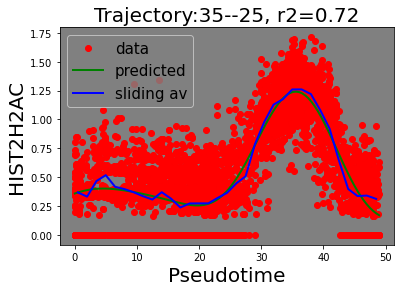

HIST2H2AC 0.718711763587307
S100A13 0.04531829753514438


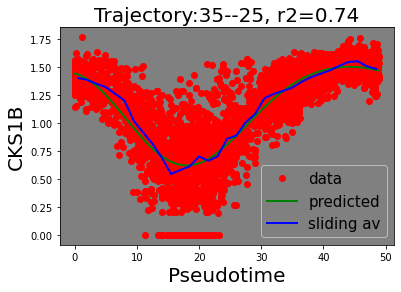

CKS1B 0.7438984483707831
LMNA -0.001992172228250766


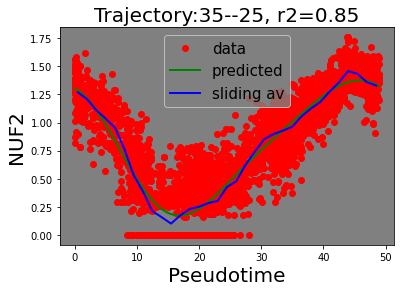

NUF2 0.8465882907762113


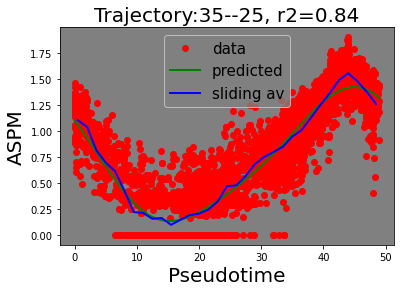

ASPM 0.8388790755469313


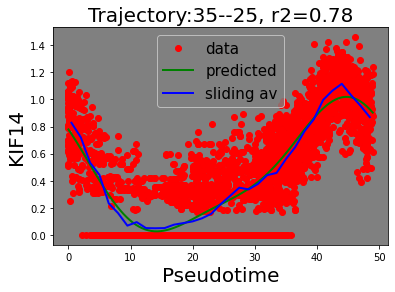

KIF14 0.7800743764258508


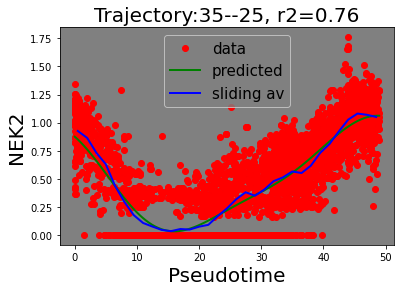

NEK2 0.7567903807567201


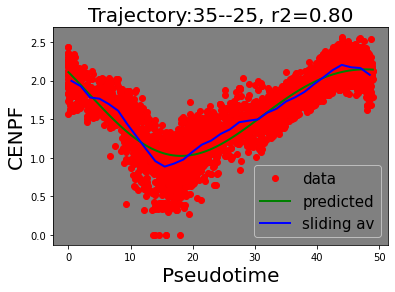

CENPF 0.7994686346422097


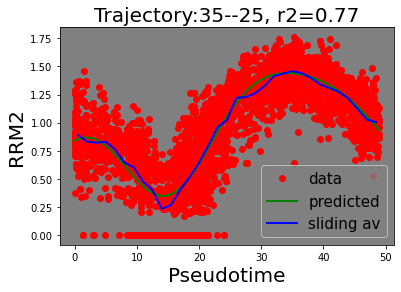

RRM2 0.7731521025521026


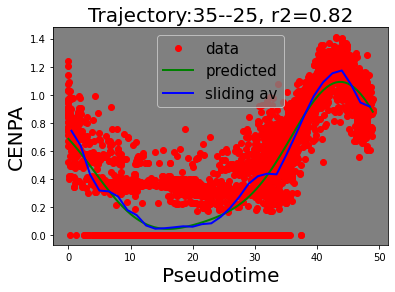

CENPA 0.8193620882413636


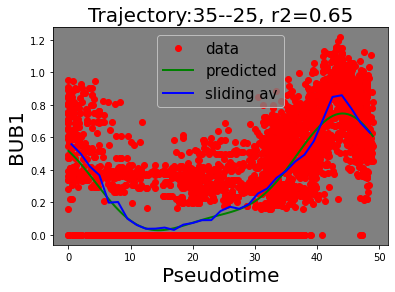

BUB1 0.6466861144474219


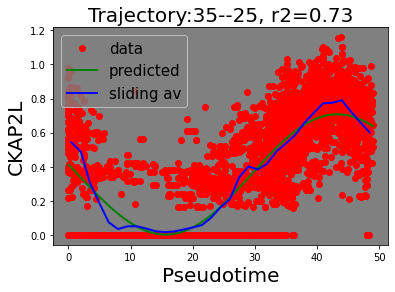

CKAP2L 0.7301989627645264


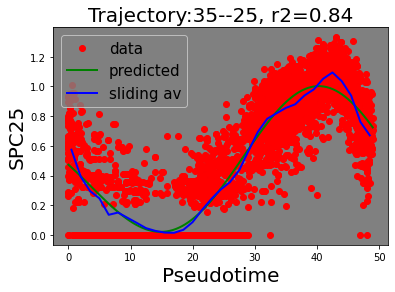

SPC25 0.8362408626929179


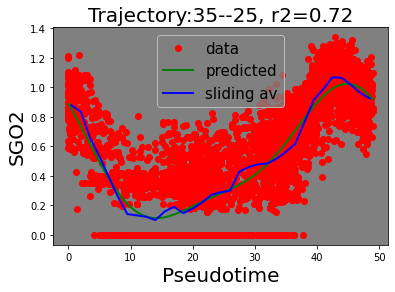

SGO2 0.7185246100303165


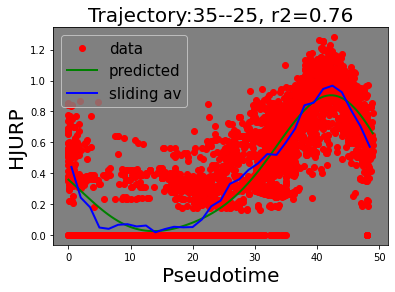

HJURP 0.7637122198224773


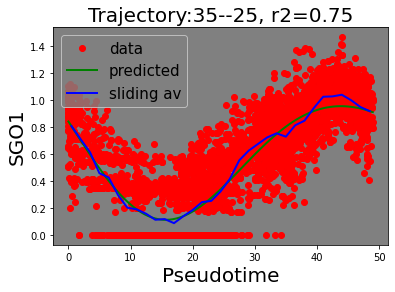

SGO1 0.7535882304358874


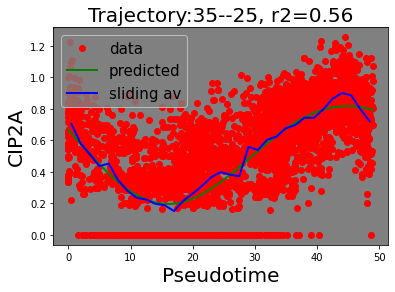

CIP2A 0.5618122764581722


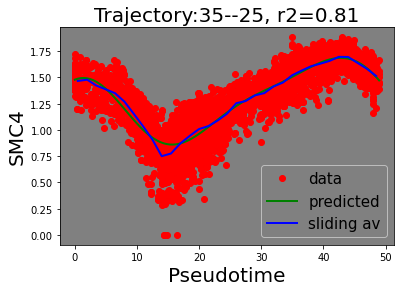

SMC4 0.8068111550584454
RPL22L1 0.06899875815234469


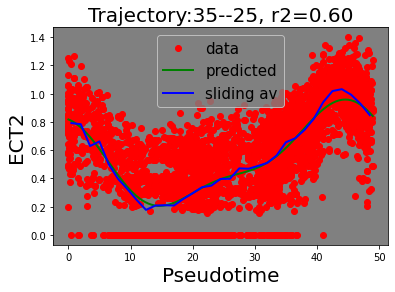

ECT2 0.5992471693430649


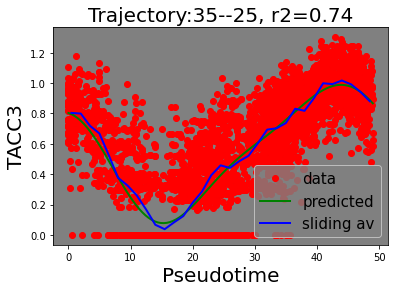

TACC3 0.7370854232529013


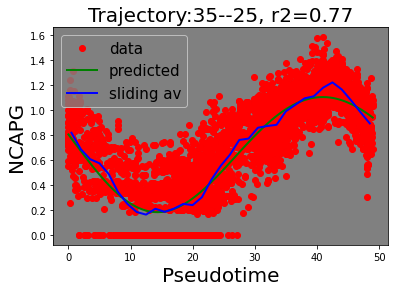

NCAPG 0.7716568115021776


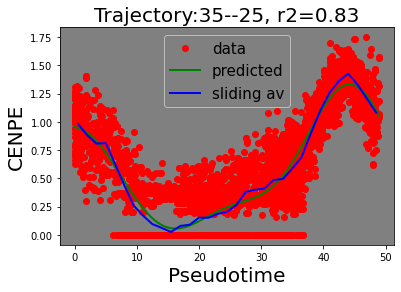

CENPE 0.8327745157923773


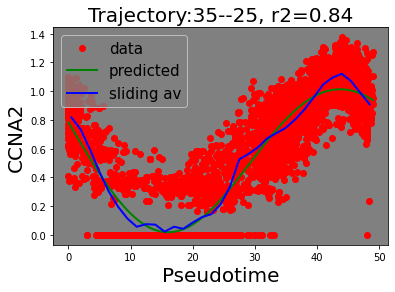

CCNA2 0.8390659890740133


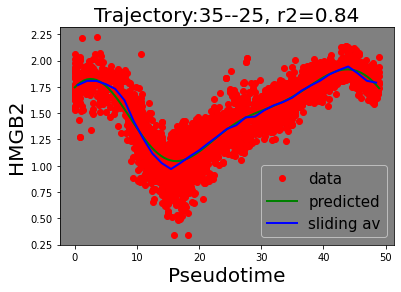

HMGB2 0.8410940879550621
BASP1 0.11462084133804662


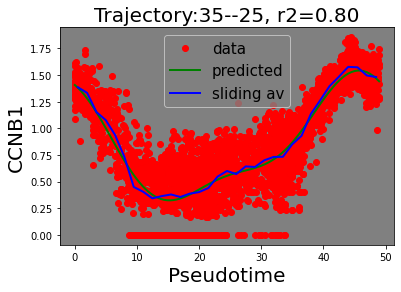

CCNB1 0.8036091866081109
OTP 0.038671737683474205
VCAN 0.04830419756821769
ISOC1 0.05651770779426435


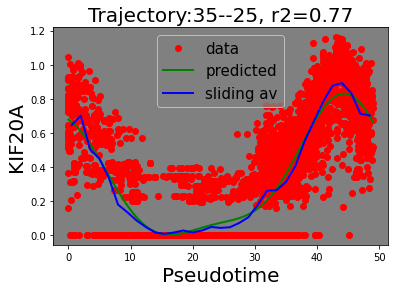

KIF20A 0.7688419974979182


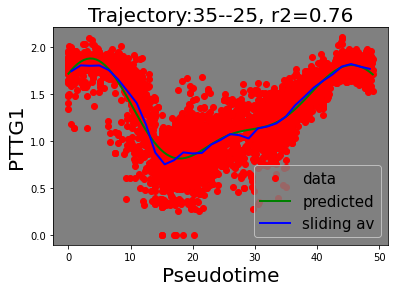

PTTG1 0.7559295332001783


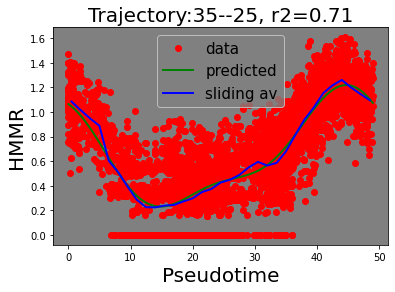

HMMR 0.7069360820458277


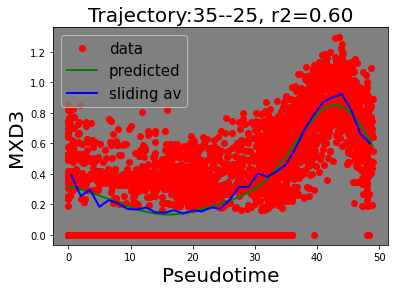

MXD3 0.6008993919462507


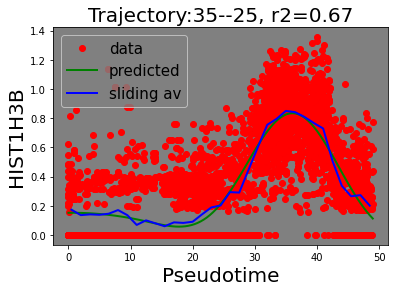

HIST1H3B 0.6739765901067198


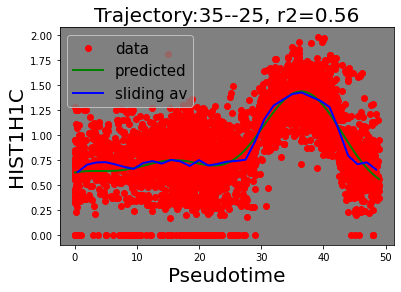

HIST1H1C 0.5565525210561422


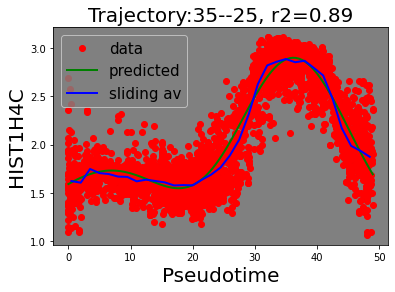

HIST1H4C 0.8857287035855516


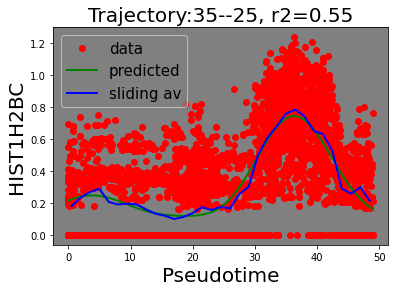

HIST1H2BC 0.548501894686765
HIST1H2AC 0.37391022596432055


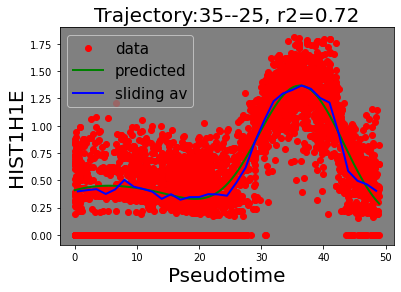

HIST1H1E 0.7213564996119841


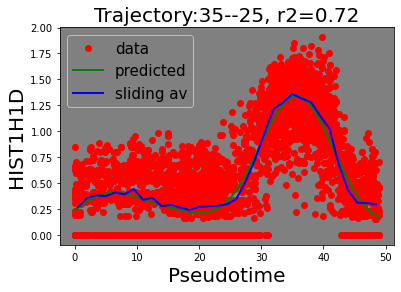

HIST1H1D 0.718988514983808
HLA-A 0.0006062307150231927


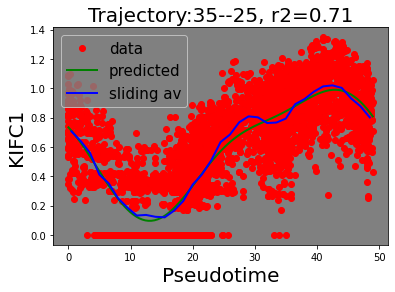

KIFC1 0.7089847879308573
CDKN1A 0.12171653297304386


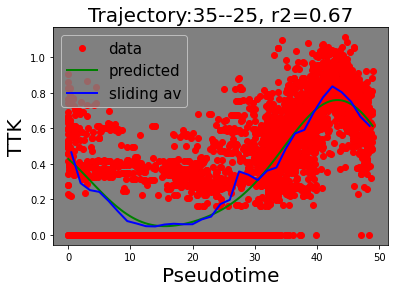

TTK 0.6721653099513761


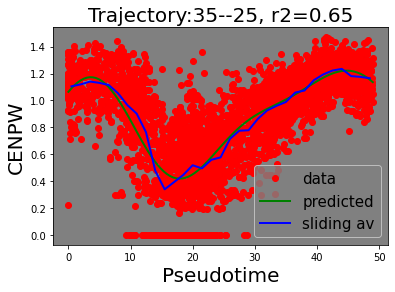

CENPW 0.6473210095537528


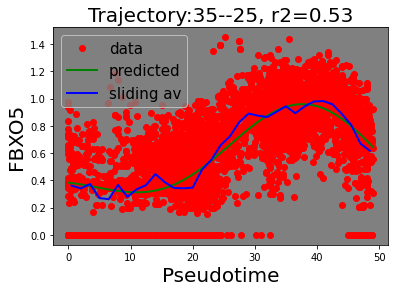

FBXO5 0.5266336632752455
CNTNAP2 0.014738324191945207
TIMP1 0.0013183487657979498
SH3BGRL 0.03385210854351195
BEX4 0.007870339472050514
AC069185.1 -0.0004044323584702081
NEFM 0.0073071856801887325
NEFL 0.022144503585700193


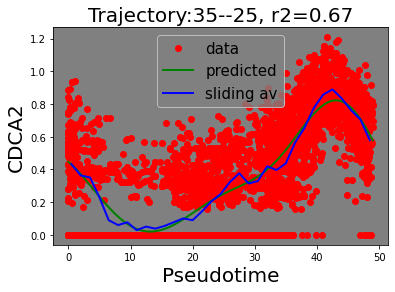

CDCA2 0.6746081305201692


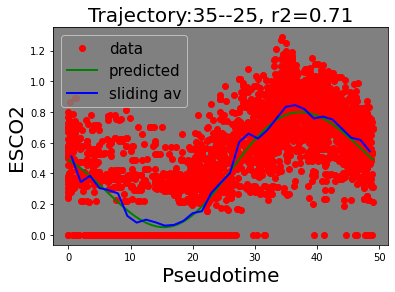

ESCO2 0.7144517021796875


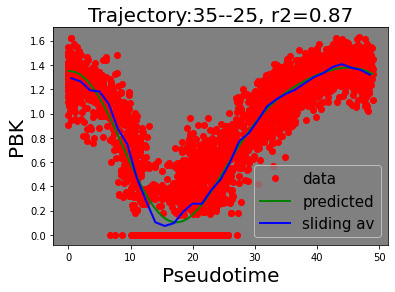

PBK 0.8729995616424263
CCNE2 0.43349377891081153
KCNQ1OT1 0.008461586268911803
CDKN1C 0.05899273408448669
TPH1 0.0025802959729831487
LMO2 0.00738666799598009


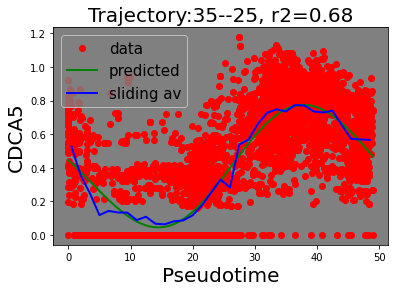

CDCA5 0.682999849808893
NEAT1 0.05942886047418339


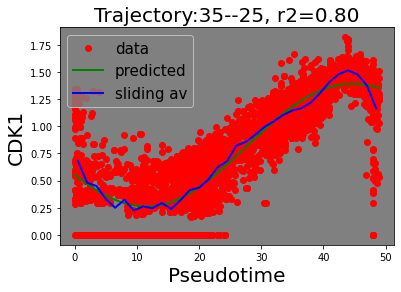

CDK1 0.8044235567793268


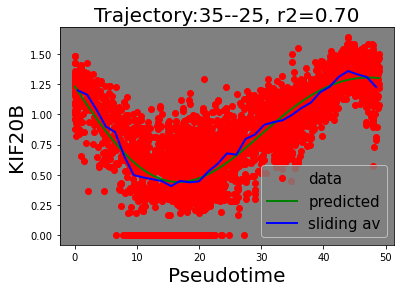

KIF20B 0.6992100247258907


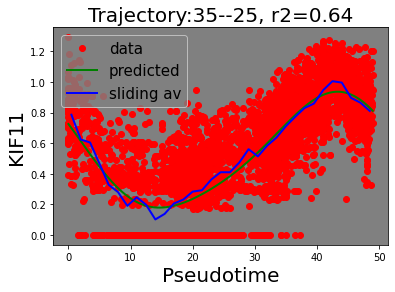

KIF11 0.6364717409171057


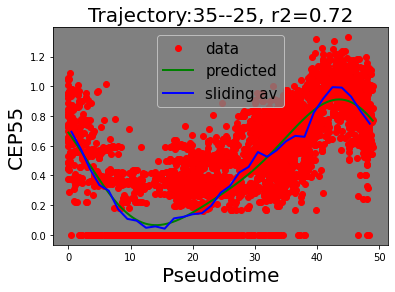

CEP55 0.7192733335866455
RRP12 0.060767024013917426


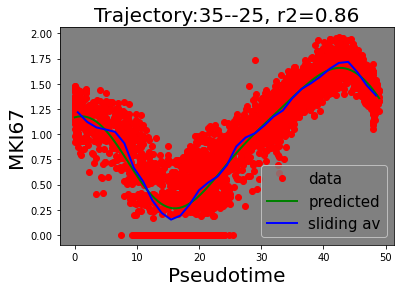

MKI67 0.8595787198633903


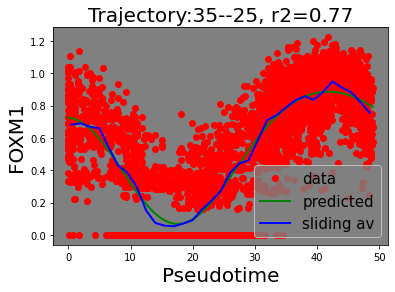

FOXM1 0.7651083046340279


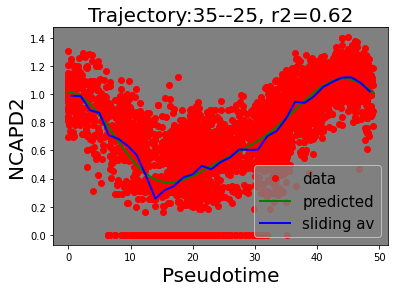

NCAPD2 0.6196707058406907


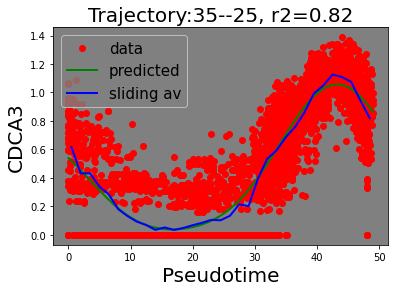

CDCA3 0.819036442517159


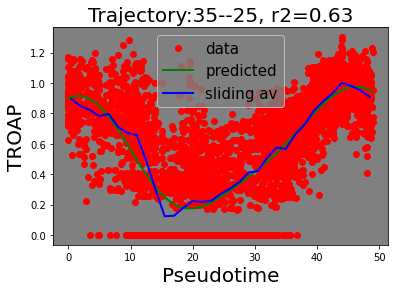

TROAP 0.6283672274411942
MDM2 0.009399136883414427
NRL 0.0062285155093193545


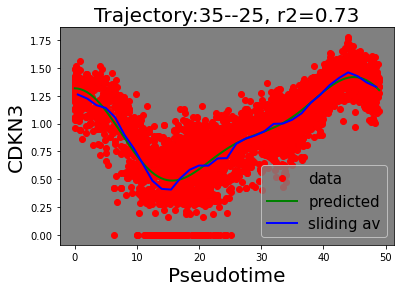

CDKN3 0.7335006067815724


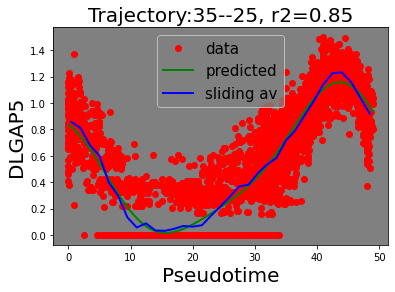

DLGAP5 0.8510298262944802
LINC01220 0.019643535933731582


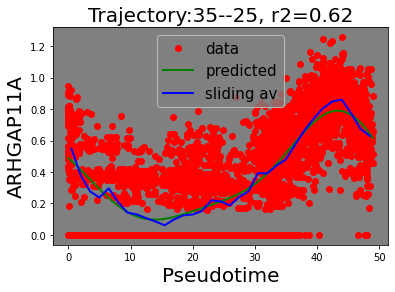

ARHGAP11A 0.6238528798610139


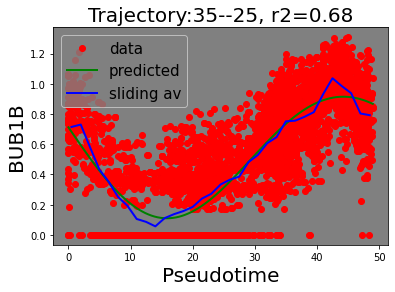

BUB1B 0.6786753271493097


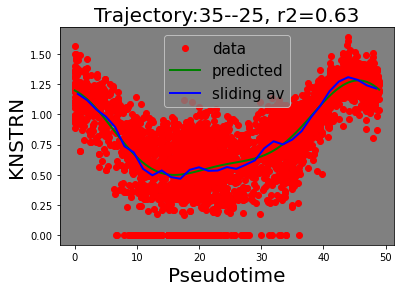

KNSTRN 0.6340738675616114


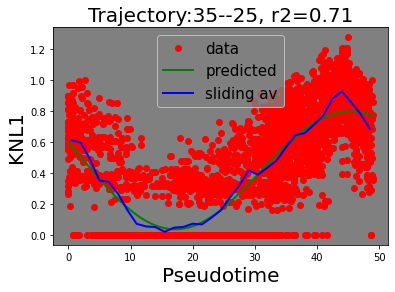

KNL1 0.7066234033023995


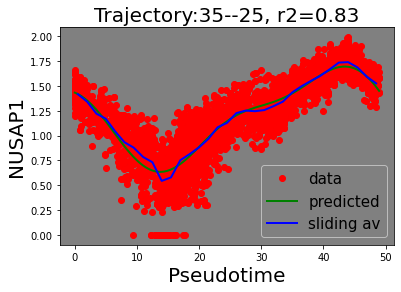

NUSAP1 0.8299087239971045


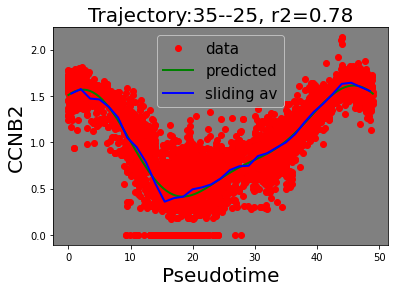

CCNB2 0.7820438772755155


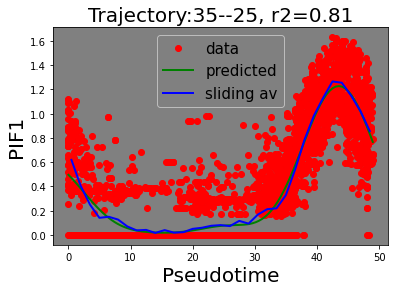

PIF1 0.807933860783346


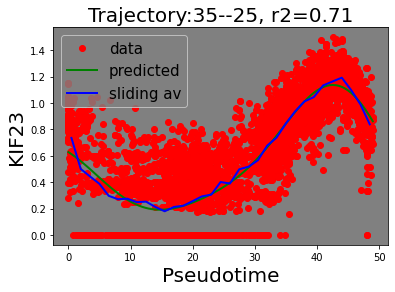

KIF23 0.7113906841014942


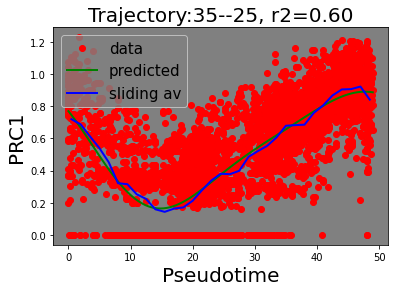

PRC1 0.5960077996623725
HBA2 0.1305712074008779
HBA1 0.07924891304899973


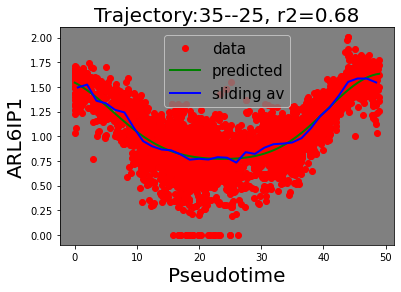

ARL6IP1 0.6803821310854932


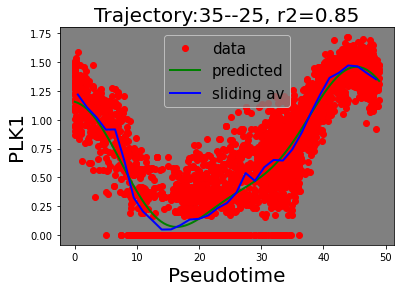

PLK1 0.8494327236644205
CYB5D2 0.07307706449714202


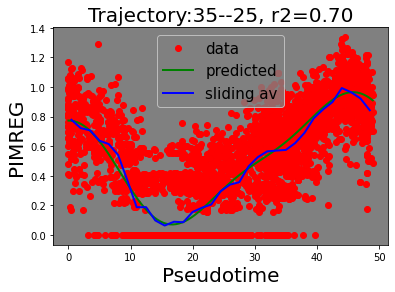

PIMREG 0.6966059080059666


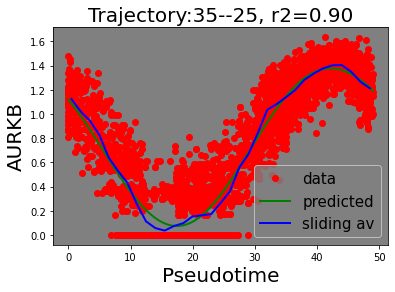

AURKB 0.8951828235705254
RCVRN 0.04349200296506517


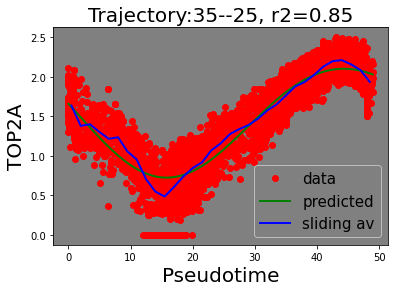

TOP2A 0.8530064267154918


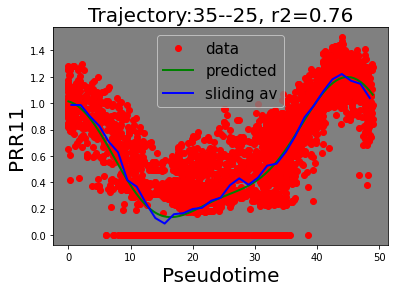

PRR11 0.7588103764872705


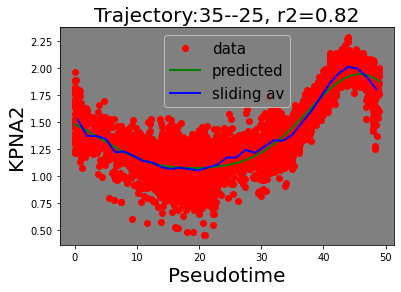

KPNA2 0.8199552178338998
ABCA5 0.04222941493138921
FDXR 0.058386446633415745


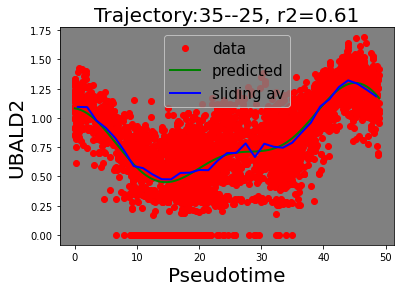

UBALD2 0.6069121222835978


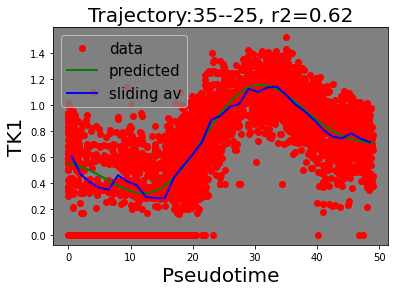

TK1 0.6203371818998842


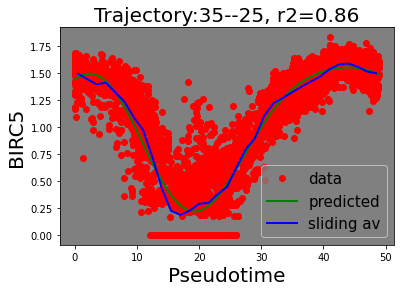

BIRC5 0.8552295327136724


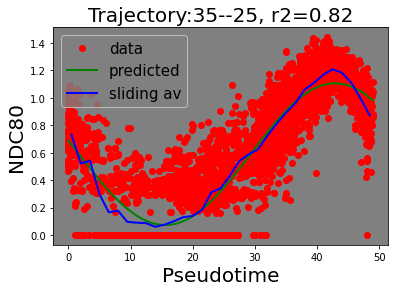

NDC80 0.8233027862562733


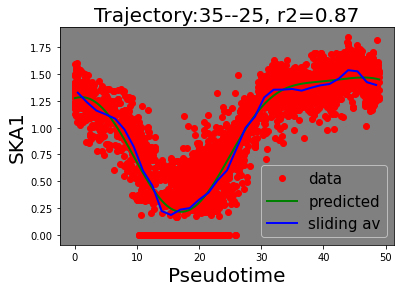

SKA1 0.8662969276058976


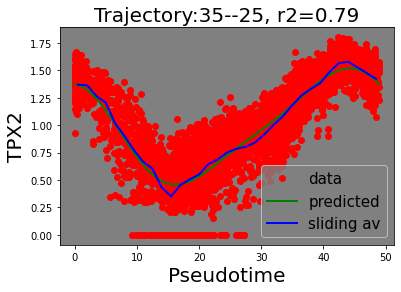

TPX2 0.7917697747783385
MROH8 0.04262134190900868


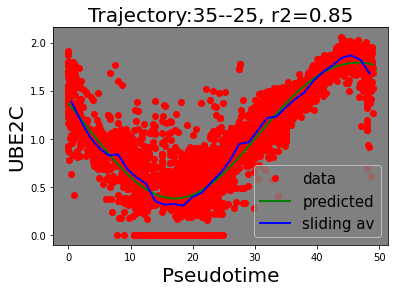

UBE2C 0.8456417072057218


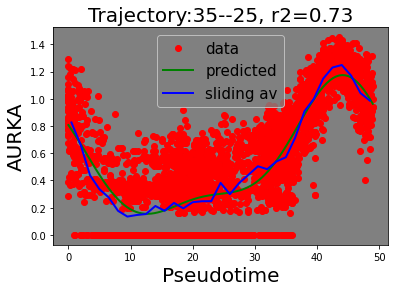

AURKA 0.7303429804309153
GDF15 0.08575440977645354
PPP1R14A 0.025257101144467553
ATF5 0.019202781685409342


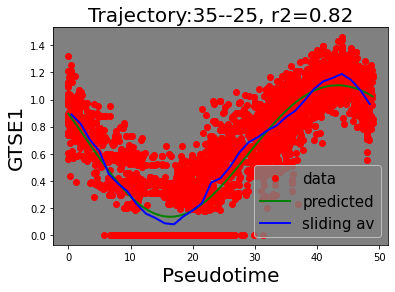

GTSE1 0.8184440175660973


In [163]:
inds = np.argwhere(vrs>0.1)

variable_types = ['CONTINUOUS']*len(gene_names)
X_original = matrix.T
R2_Threshold=0.5


for i in inds:
    var = gene_names[i[0]]
    var_names = gene_names
    regression_of_variable_with_trajectories(PseudoTimeTraj,var,var_names,variable_types,X_original,verbose=False,producePlot=True,R2_Threshold=R2_Threshold,Continuous_Regression_Type='gpr')

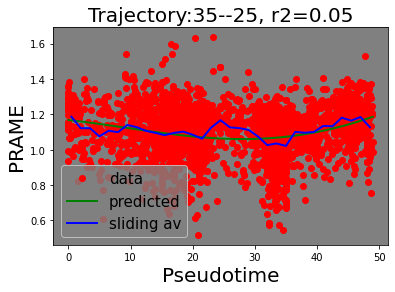

PRAME 0.048459910879335655


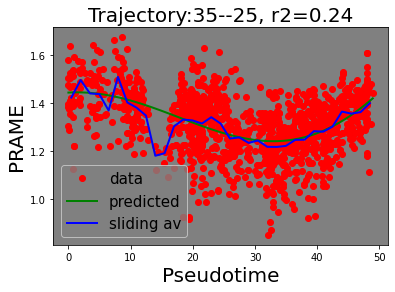

PRAME 0.2415036187196734


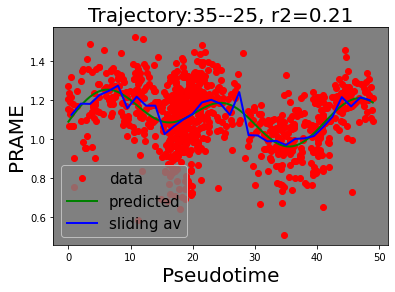

PRAME 0.21169893452896604
----------> PRAME 0.0072001301309486745


In [143]:
variable_types = ['CONTINUOUS']*len(gene_names)
X_original = matrix.T[:,:]
R2_Threshold=-1
var_names = gene_names

gene_set = ['NEAT1','CDKN1C','BEX4','TPH1','CHID1','CD81','POLR2L','HRAS','NAP1L4','LIMD2','DACH1','RPLP2','DEAF1','TALDO1','TUBB2B','PHLDA2','EMP3','H3F3B','C1QTNF4','AP2A2','ASMT','RNH1','SOX11','UPF3A','ELAVL3','TSSC4','PTDSS2','MID1IP1','SLC35B1','ACP1','RAB13','MRPL23','CRACR2B','SEPT9','PRAME','EIPR1','SSTR2','NPTX1','ZNF195','IGF2BP1','RRM2','MFNG','CYTH1','FASN','STK24','SERPING1','PHRF1','ATP1B2','RAC3','RRM1','LRRC59','POU4F1','GATD1','TFDP1','YWHAQ','NARF','ARHGDIA','DCAF7','CHAMP1','ADI1','MRPL27','TMSB4X','CYBC1','RBFOX3','ENDOV','SNF8','NHLH1','DRAXIN','SLC25A22','B4GALNT4','JPT1','ECEL1','TCEAL8','CDCA7L','ARHGEF7','ODC1','PIDD1','LGALS1','NKAIN1','TRAPPC12','RIC8A','VIM','PSMD13','PCID2','CTCFL','FAM89B','SAMSN1','TSPAN4']
gene_set = ['PRAME']

#SSTR2,YWHAQ,VIM,PRAME,RRM1,TPH1,DRAXIN,MRPL27,PIDD1,PHLDA2


filter1=np.where(np.isin(points,inds1))
filter2=np.where(np.isin(points,inds2))
filter3=np.where(np.isin(points,inds3))

for gene in gene_set:
    pstt1 = PseudoTimeTraj[0].copy()
    pstt1['Points'] = points[filter1]
    pstt1['Pseudotime'] = pst[filter1]
    #print(np.mean(matrix[gene_names.index(gene),inds1]))
    
    
    pstt2 = PseudoTimeTraj[0].copy()
    pstt2['Points'] = points[filter2]
    pstt2['Pseudotime'] = pst[filter2]
    
    pstt3 = PseudoTimeTraj[0].copy()
    pstt3['Points'] = points[filter3]
    pstt3['Pseudotime'] = pst[filter3]
    
    assoc = regression_of_variable_with_trajectories([pstt1,pstt2,pstt3],gene,var_names,variable_types,
                                                     X_original,verbose=False,producePlot=True,R2_Threshold=R2_Threshold,
                                                     Continuous_Regression_Type='gpr')
    score = np.var([assoc[0][2],assoc[1][2],assoc[2][2]])
    print('---------->',gene,score)

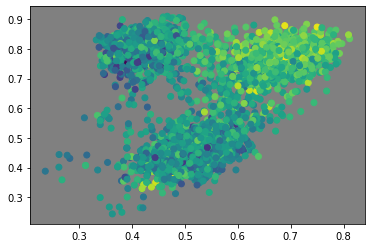

In [145]:
gene = 'PRAME'
genev = matrix[gene_names.index(gene),:]
plt.scatter(df['Y79_IC2'],df['Y79_IC9+'],c=genev)

1.0984460384070636
1.3099541657755092
1.112998006753887


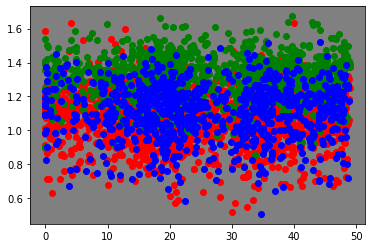

In [144]:
variable_types = ['CONTINUOUS']*len(gene_names)
X_original = matrix.T
R2_Threshold=-1
var_names = gene_names
#gene = 'NEAT1'
gene = 'PRAME'
genev = matrix[gene_names.index(gene),:]

plt.scatter(pst[inds1],genev[inds1],c='r')
print(np.mean(genev[inds1]))
plt.scatter(pst[inds2],genev[inds2],c='g')
print(np.mean(genev[inds2]))
plt.scatter(pst[inds3],genev[inds3],c='b')
print(np.mean(genev[inds3]))

In [30]:
import anndata
import scanpy as sc

fn = folder+prefix+prefix1
adata = anndata.read_text(fn,delimiter='\t').transpose()

In [33]:
display(adata)
print(adata.obs_names)
sc.pp.pca(adata, n_comps=50)

AnnData object with n_obs × n_vars = 4388 × 10000

Index(['AAACCCAAGAGCAAGA', 'AAACCCAAGTTCATCG', 'AAACCCAGTGACGCCT',
       'AAACCCAGTGCAATAA', 'AAACCCAGTTAAGTCC', 'AAACCCATCGTGGCTG',
       'AAACCCATCTGCATAG', 'AAACGAACAAATCCCA', 'AAACGCTAGTGTTGAA',
       'AAACGCTCATAGGAGC',
       ...
       'TTTGGAGGTACCCACG', 'TTTGGTTAGTATTGCC', 'TTTGGTTCATGGAGAC',
       'TTTGGTTGTTGAGTCT', 'TTTGTTGAGCAACCAG', 'TTTGTTGCACAGTCAT',
       'TTTGTTGCACCCTAAA', 'TTTGTTGGTCGATGCC', 'TTTGTTGGTTGCCGAC',
       'TTTGTTGTCGGCTATA'],
      dtype='object', length=4388)


In [34]:
import skdim
import time

n_neighbors = 500
print('Computing dimensionality in embedding',adata.obsm['X_pca'].shape[1])
adata.uns[f'lid{n_neighbors}']={}

s=time.time()
print(round(time.time()-s,2),'Computing DANCo')
danco_caldata = skdim.gid.DANCo(D=50).fit(np.random.random((n_neighbors,50))).calibration_data_
adata.uns[f'lid{n_neighbors}']['DANCo'] = skdim.asPointwise(adata.obsm['X_pca'],skdim.gid.DANCo(D=50,calibration_data=danco_caldata), n_neighbors=n_neighbors)
print(round(time.time()-s,2),'Computing ESS')
adata.uns[f'lid{n_neighbors}']['ESS'] = skdim.asPointwise(adata.obsm['X_pca'],skdim.lid.ESS(),n_neighbors=n_neighbors)
print(round(time.time()-s,2),'Computing FisherS')
adata.uns[f'lid{n_neighbors}']['FisherS'] = skdim.asPointwise(adata.obsm['X_pca'],skdim.lid.FisherS(),n_neighbors=n_neighbors)
print(round(time.time()-s,2),'Computing TwoNN')
adata.uns[f'lid{n_neighbors}']['TwoNN'] = skdim.asPointwise(adata.obsm['X_pca'],skdim.gid.TwoNN(),n_neighbors=n_neighbors)
print(round(time.time()-s,2),'alphaFO_0.1_PCA')
adata.uns[f'lid{n_neighbors}']['alphaFO_0.1_PCA'] = skdim.asPointwise(adata.obsm['X_pca'],skdim.lid.lPCA(alphaFO=.1),n_neighbors=n_neighbors)

print('Time',round(time.time()-s,2))

Computing dimensionality in embedding 50
Time 897.13


[7.61839799 9.96178991 6.92870614 ... 7.67147443 7.76094178 8.83109963]


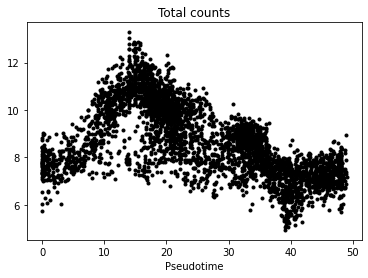

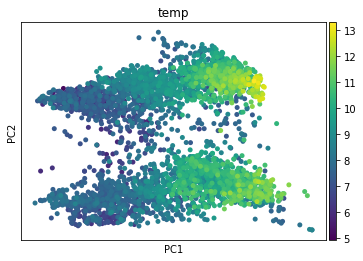

In [38]:
#fs = np.array(adata.uns[f'lid{n_neighbors}']['FisherS'])
fs = np.array(adata.uns[f'lid{n_neighbors}']['ESS'])
#fs = np.array(adata.uns[f'lid{n_neighbors}']['TwoNN'])
#fs = np.array(adata.uns[f'lid{n_neighbors}']['DANCo'])
#fs = np.array(adata.uns[f'lid{n_neighbors}']['alphaFO_0.1_PCA'])
#fs = adata.obs['pct_counts_mt']
adata
print(fs)
plt.plot(pst,fs[points],'k.')
plt.title('Total counts')
plt.xlabel('Pseudotime')
plt.show()

adata.obs['temp'] = fs
sc.pl.pca(adata,color='temp',s=100)